In [152]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer

In [153]:
# Importando os dados
arquivo = 'atividade3 - Dataset_sint_tico_de_voos.csv'
df = pd.read_csv(arquivo)

In [154]:
# Inspecionando a estrutura do DataFrame

# Verificando a dimensão do DataFrame
df.shape

(100, 9)

In [155]:
# Analisando as informações iniciais
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
0,2023-01-01,AZUL,N1000,GIG,FOR,1369,7.0,32.0,4984
1,2023-01-02,SW,N1001,BSB,MIA,1986,-42.0,-38.0,4200
2,2023-01-03,LATAM,N1002,ORD,REC,1534,-30.0,21.0,1833
3,2023-01-04,AZUL,N1003,JFK,FOR,146,-39.0,52.0,2352
4,2023-01-05,UA,N1004,GIG,SFO,1734,-24.0,42.0,710


In [156]:
# Exibindo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FL_DATE            100 non-null    object 
 1   OP_UNIQUE_CARRIER  100 non-null    object 
 2   TAIL_NUM           100 non-null    object 
 3   ORIGIN             100 non-null    object 
 4   DEST               100 non-null    object 
 5   CRS_DEP_TIME       100 non-null    int64  
 6   DEP_DELAY          90 non-null     float64
 7   ARR_DELAY          90 non-null     float64
 8   DISTANCE           100 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


In [157]:
# Gerando estatísticas descritivas
df.describe()

,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE
count,100.00000,90.000000,90.000000,100.000000
mean,1242.93000,9.066667,7.688889,2897.620000
std,686.19325,33.684525,39.095574,1420.354052
min,16.00000,-57.000000,-103.000000,337.000000
25%,626.00000,-15.000000,-20.500000,1859.250000
50%,1230.50000,7.000000,6.000000,2940.000000
75%,1812.25000,33.250000,36.250000,4266.000000
max,2331.00000,106.000000,90.000000,4984.000000


In [158]:
# Ajustando FL_DATE para tipo datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Classificando as colunas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print('Coluna de data: FL_DATE')
print(f'Lista de colunas númericas: {colunas_numericas}')
print(f'Lista de colunas categóricas: {colunas_categoricas}')

Coluna de data: FL_DATE
Lista de colunas númericas: ['CRS_DEP_TIME', 'DEP_DELAY', 'ARR_DELAY', 'DISTANCE']
Lista de colunas categóricas: ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST']


In [159]:
# Correção de categorias inconsistentes
df[colunas_categoricas] = df[colunas_categoricas].apply(lambda x: x.str.strip().str.upper())

df[colunas_categoricas].head()

,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST
0,AZUL,N1000,GIG,FOR
1,SW,N1001,BSB,MIA
2,LATAM,N1002,ORD,REC
3,AZUL,N1003,JFK,FOR
4,UA,N1004,GIG,SFO


In [160]:
# Tratando os valores ausentes

# Quantidade de valores ausentes por coluna:
df.isnull().sum()

FL_DATE               0
OP_UNIQUE_CARRIER     0
TAIL_NUM              0
ORIGIN                0
DEST                  0
CRS_DEP_TIME          0
DEP_DELAY            10
ARR_DELAY            10
DISTANCE              0
dtype: int64

In [161]:
# Porcentagem de valores ausentes por coluna:
porcentagem_nulos = (df.isnull().mean() * 100).round(2)
print(porcentagem_nulos)

FL_DATE               0.0
OP_UNIQUE_CARRIER     0.0
TAIL_NUM              0.0
ORIGIN                0.0
DEST                  0.0
CRS_DEP_TIME          0.0
DEP_DELAY            10.0
ARR_DELAY            10.0
DISTANCE              0.0
dtype: float64


In [162]:
# Tratamento dos valores ausentes

imputer = SimpleImputer(strategy='constant', fill_value=0, add_indicator=True)
dados_imputados = imputer.fit_transform(df[colunas_numericas])
nomes_novas_colunas = imputer.get_feature_names_out(colunas_numericas)

df[nomes_novas_colunas] = dados_imputados

# Verificação dos nulos
df.isnull().sum()

FL_DATE                       0
OP_UNIQUE_CARRIER             0
TAIL_NUM                      0
ORIGIN                        0
DEST                          0
CRS_DEP_TIME                  0
DEP_DELAY                     0
ARR_DELAY                     0
DISTANCE                      0
missingindicator_DEP_DELAY    0
missingindicator_ARR_DELAY    0
dtype: int64

 Os dados nulos foram tratados com SimpleImputer + uso de flags pois é uma solução que se alinha ao Machine Learning e também considera que os dados nulos presentes nas colunas referentes à atraso não devem ser imputados com valores como moda ou mediana, pois isso poderia acabar "sujando" o dataset com valores de atraso que não ocorreram na realidade.

In [163]:
# Verificação das primeiras linhas do DataFrame
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE,missingindicator_DEP_DELAY,missingindicator_ARR_DELAY
0,2023-01-01,AZUL,N1000,GIG,FOR,1369.0,7.0,32.0,4984.0,0.0,0.0
1,2023-01-02,SW,N1001,BSB,MIA,1986.0,-42.0,-38.0,4200.0,0.0,0.0
2,2023-01-03,LATAM,N1002,ORD,REC,1534.0,-30.0,21.0,1833.0,0.0,0.0
3,2023-01-04,AZUL,N1003,JFK,FOR,146.0,-39.0,52.0,2352.0,0.0,0.0
4,2023-01-05,UA,N1004,GIG,SFO,1734.0,-24.0,42.0,710.0,0.0,0.0


In [164]:
# Criação de 2 colunas binárias referentes ao atraso > 15 min

df['atraso_dep_maior_15min'] = np.where((df['DEP_DELAY'] > 15), 1, 0)
df['atraso_arr_maior_15min'] = np.where((df['ARR_DELAY'] > 15), 1 ,0)
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE,missingindicator_DEP_DELAY,missingindicator_ARR_DELAY,atraso_dep_maior_15min,atraso_arr_maior_15min
0,2023-01-01,AZUL,N1000,GIG,FOR,1369.0,7.0,32.0,4984.0,0.0,0.0,0,1
1,2023-01-02,SW,N1001,BSB,MIA,1986.0,-42.0,-38.0,4200.0,0.0,0.0,0,0
2,2023-01-03,LATAM,N1002,ORD,REC,1534.0,-30.0,21.0,1833.0,0.0,0.0,0,1
3,2023-01-04,AZUL,N1003,JFK,FOR,146.0,-39.0,52.0,2352.0,0.0,0.0,0,1
4,2023-01-05,UA,N1004,GIG,SFO,1734.0,-24.0,42.0,710.0,0.0,0.0,0,1


In [165]:
# Criação de colunas de atraso absoluto para análise
df['atraso_absoluto_dep'] = df['DEP_DELAY'].abs()
df['atraso_absoluto_arr'] = df['ARR_DELAY'].abs()
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE,missingindicator_DEP_DELAY,missingindicator_ARR_DELAY,atraso_dep_maior_15min,atraso_arr_maior_15min,atraso_absoluto_dep,atraso_absoluto_arr
0,2023-01-01,AZUL,N1000,GIG,FOR,1369.0,7.0,32.0,4984.0,0.0,0.0,0,1,7.0,32.0
1,2023-01-02,SW,N1001,BSB,MIA,1986.0,-42.0,-38.0,4200.0,0.0,0.0,0,0,42.0,38.0
2,2023-01-03,LATAM,N1002,ORD,REC,1534.0,-30.0,21.0,1833.0,0.0,0.0,0,1,30.0,21.0
3,2023-01-04,AZUL,N1003,JFK,FOR,146.0,-39.0,52.0,2352.0,0.0,0.0,0,1,39.0,52.0
4,2023-01-05,UA,N1004,GIG,SFO,1734.0,-24.0,42.0,710.0,0.0,0.0,0,1,24.0,42.0


In [166]:
# Extração do mês e do dia da semana da coluna FL_DATE
df['MES'] = df['FL_DATE'].dt.month
df['DIA_SEMANA'] = df['FL_DATE'].dt.dayofweek
df.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE,missingindicator_DEP_DELAY,missingindicator_ARR_DELAY,atraso_dep_maior_15min,atraso_arr_maior_15min,atraso_absoluto_dep,atraso_absoluto_arr,MES,DIA_SEMANA
0,2023-01-01,AZUL,N1000,GIG,FOR,1369.0,7.0,32.0,4984.0,0.0,0.0,0,1,7.0,32.0,1,6
1,2023-01-02,SW,N1001,BSB,MIA,1986.0,-42.0,-38.0,4200.0,0.0,0.0,0,0,42.0,38.0,1,0
2,2023-01-03,LATAM,N1002,ORD,REC,1534.0,-30.0,21.0,1833.0,0.0,0.0,0,1,30.0,21.0,1,1
3,2023-01-04,AZUL,N1003,JFK,FOR,146.0,-39.0,52.0,2352.0,0.0,0.0,0,1,39.0,52.0,1,2
4,2023-01-05,UA,N1004,GIG,SFO,1734.0,-24.0,42.0,710.0,0.0,0.0,0,1,24.0,42.0,1,3


In [167]:
# Filtragem e segmentação com fim de verificação da média de atrasos de uma companhia
# em relação a outras

# Análise da companhia com maior número de voos registrados
df['OP_UNIQUE_CARRIER'].value_counts()

OP_UNIQUE_CARRIER
SW       21
DL       17
AZUL     16
GOL      15
LATAM    12
UA       11
AA        8
Name: count, dtype: int64

Air Namibia possui o maior número de voos registrados nesse dataset.

In [168]:
# Calculando a média considerando que valores < 0 vão ser iguais a 0 no cálculo
# pois se atraso < 0, então o voo chegou adiantado.
media_geral_atrasos_dep = df['DEP_DELAY'].clip(lower=0).mean()
media_geral_atrasos_arr = df['ARR_DELAY'].clip(lower=0).mean()

media_sw_atrasos_dep = df.query("OP_UNIQUE_CARRIER == 'SW'")['DEP_DELAY'].clip(lower=0).mean()
media_sw_atrasos_arr = df.query("OP_UNIQUE_CARRIER == 'SW'")['ARR_DELAY'].clip(lower=0).mean()

print(f'Média Geral de atrasos na Decolagem: {media_geral_atrasos_dep:.2f} min.')
print(f'Média Geral de atrasos na Chegada: {media_geral_atrasos_arr:.2f} min.')
print(f'Média de atrasos da companhia Air Namibia na Decolagem: {media_sw_atrasos_dep:.2f} min.')
print(f'Média de atrasos da companhia Air Namibia na Chegada: {media_sw_atrasos_arr:.2f} min.')

Média Geral de atrasos na Decolagem: 16.62 min.
Média Geral de atrasos na Chegada: 17.79 min.
Média de atrasos da companhia Air Namibia na Decolagem: 17.00 min.
Média de atrasos da companhia Air Namibia na Chegada: 14.19 min.


In [169]:
# Análise de outliers por meio da identificação de quartis e uso da regra IQR
Q1_DEP = df['DEP_DELAY'].quantile(0.25)
Q3_DEP = df['DEP_DELAY'].quantile(0.75)

Q1_ARR = df['ARR_DELAY'].quantile(0.25)
Q3_ARR = df['ARR_DELAY'].quantile(0.75)

IQR_DEP = Q3_DEP - Q1_DEP
IQR_ARR = Q3_ARR - Q1_ARR

limite_inferior_dep = Q1_DEP - (1.5 * IQR_DEP)
limite_superior_dep = Q3_DEP + (1.5 * IQR_DEP)

limite_inferior_arr = Q1_ARR - (1.5 * IQR_ARR)
limite_superior_arr = Q3_ARR + (1.5 * IQR_ARR)

# Criação de flags para identificação de outliers (1 se for outlier, 0 se for normal)
df['FLAG_DEP_DELAY_OUTLIER'] = np.where((df['DEP_DELAY'] < limite_inferior_dep) | (df['DEP_DELAY'] > limite_superior_dep), 1, 0)
df['FLAG_ARR_DELAY_OUTLIER'] = np.where((df['ARR_DELAY'] < limite_inferior_arr) | (df['ARR_DELAY'] > limite_superior_arr), 1, 0)

# Verificação da quantidade de outliers
print(df['FLAG_DEP_DELAY_OUTLIER'].value_counts())
print(f'\n{df['FLAG_ARR_DELAY_OUTLIER'].value_counts()}')

FLAG_DEP_DELAY_OUTLIER
0    99
1     1
Name: count, dtype: int64

FLAG_ARR_DELAY_OUTLIER
0    99
1     1
Name: count, dtype: int64


In [170]:
# Calculando skewness e kurtosis para análise
skewness_dep = df['DEP_DELAY'].skew()
skewness_arr = df['ARR_DELAY'].skew()

kurtosis_dep = df['DEP_DELAY'].kurt()
kurtosis_arr = df['ARR_DELAY'].kurt()

print(f'Skewness DEP_DELAY (Assimetria): {skewness_dep:.2f}')
print(f'Skewness ARR_DELAY (Assimetria): {skewness_arr:.2f}')
print(f'Kurtosis DEP_DELAY (Curtose): {kurtosis_dep:.2f}')
print(f'Kurtosis ARR_DELAY (Curtose): {kurtosis_arr:.2f}')

Skewness DEP_DELAY (Assimetria): 0.39
Skewness ARR_DELAY (Assimetria): -0.05
Kurtosis DEP_DELAY (Curtose): -0.04
Kurtosis ARR_DELAY (Curtose): 0.04


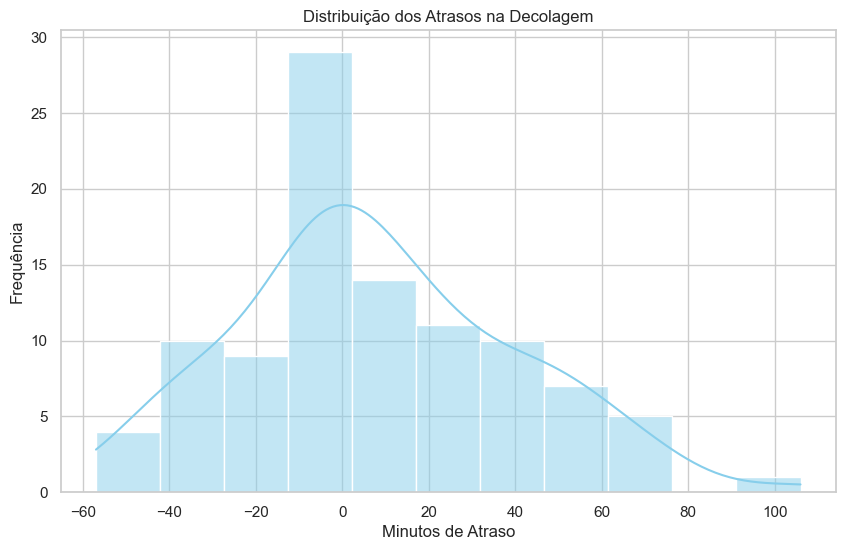

In [171]:
# Geração de visualização exploratórias

# Criação da pasta para salvar os pngs
pasta_saida = 'graficos_atividade3'
os.makedirs(pasta_saida, exist_ok=True)

sns.set_theme(style='whitegrid')

# Histograma da coluna DEP_DELAY
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], kde=True, color='skyblue')
plt.title('Distribuição dos Atrasos na Decolagem')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Frequência')
plt.savefig(f'{pasta_saida}/histograma_atrasos_dep.png')
plt.show()


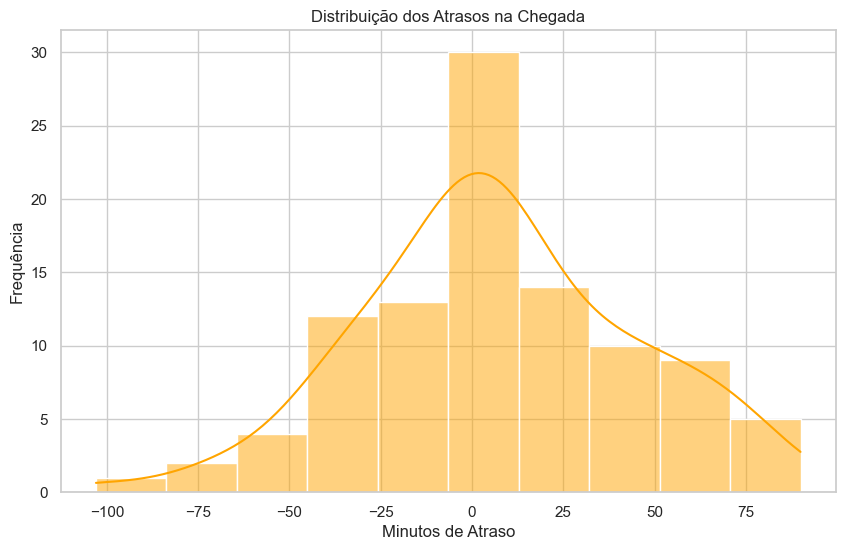

In [172]:
# Histograma da coluna ARR_DELAY
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY'], kde=True, color='orange')
plt.title('Distribuição dos Atrasos na Chegada')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Frequência')
plt.savefig(f'{pasta_saida}/histograma_atrasos_arr.png')
plt.show()

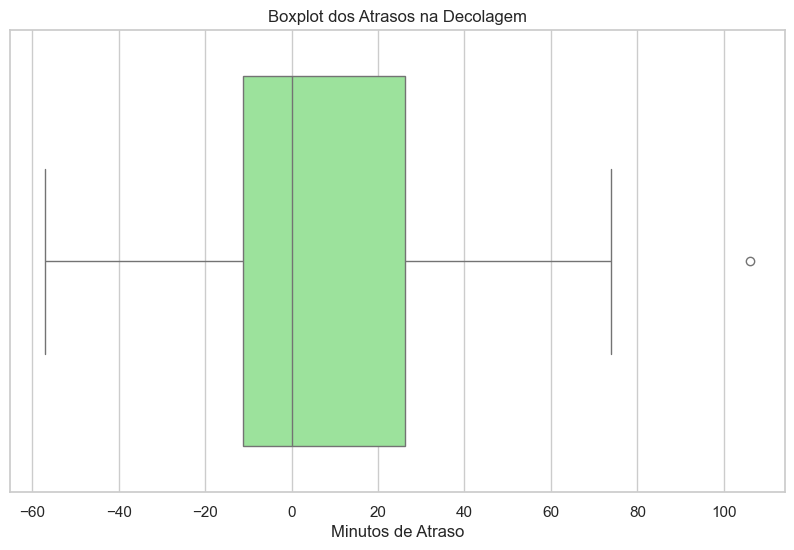

In [173]:
# Boxplot da coluna DEP_DELAY
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DEP_DELAY'], color='lightgreen')
plt.title('Boxplot dos Atrasos na Decolagem')
plt.xlabel('Minutos de Atraso')
plt.savefig(f'{pasta_saida}/boxplot_atrasos_dep.png')
plt.show()

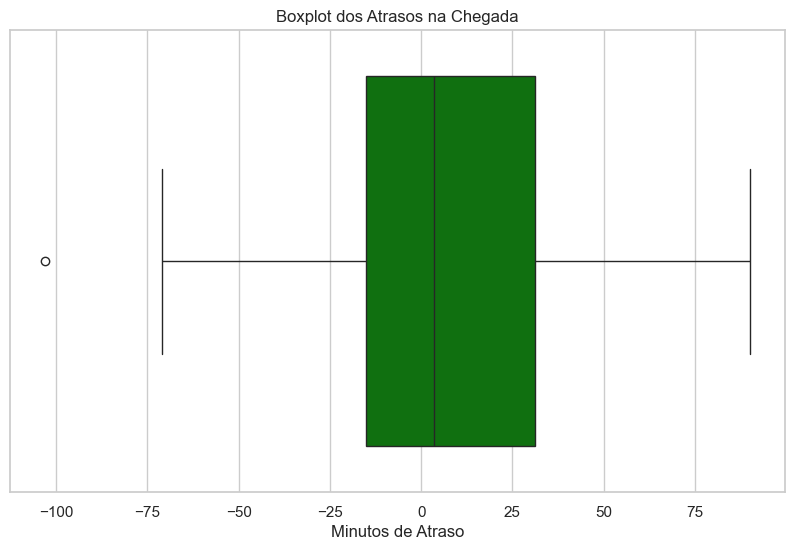

In [174]:
# Boxplot da coluna ARR_DELAY
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ARR_DELAY'], color='green')
plt.title('Boxplot dos Atrasos na Chegada')
plt.xlabel('Minutos de Atraso')
plt.savefig(f'{pasta_saida}/boxplot_atrasos_arr.png')
plt.show()

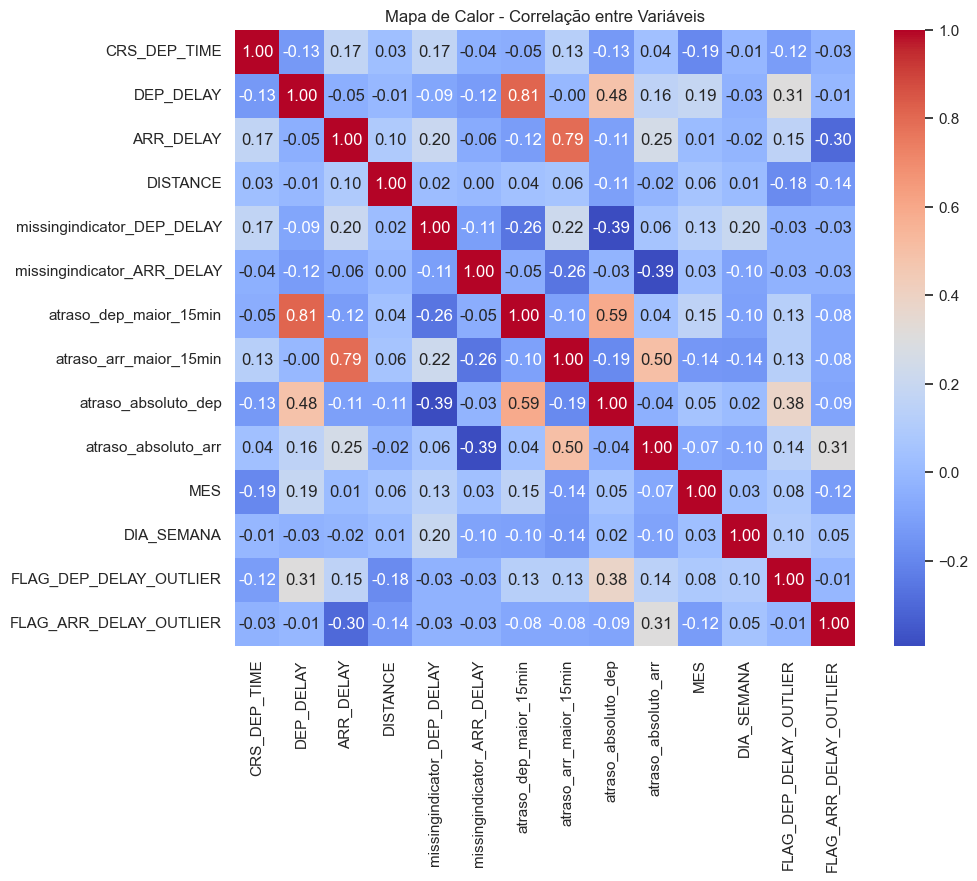

In [175]:
# Heatmap de correlações para variáveis numéricas

# Selecionando as colunas numéricas
num_colunas = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
matriz_corr = num_colunas.corr()
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.savefig(f'{pasta_saida}/heatmap_correlacao.png')
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_11816\1407432757.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ORIGIN', y='DEP_DELAY', data=top_aeroportos_dep, palette='viridis')


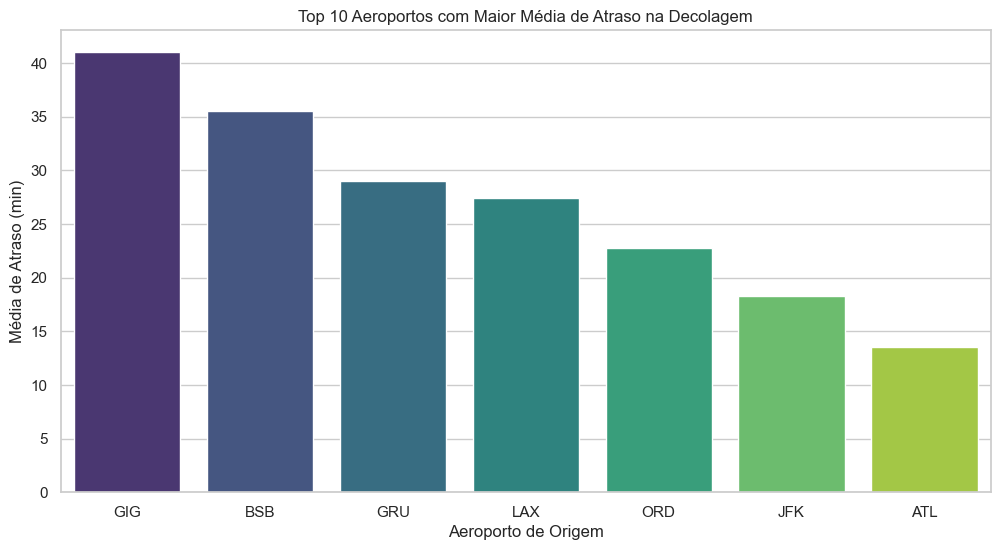

In [176]:
# Barplot dos aeroportos com maior média de atrasos

# Filtrando os atrasos para calcular a média
df_atraso_positivo_dep = df[df['DEP_DELAY'] >= 0]
df_atraso_positivo_arr = df[df['ARR_DELAY'] >= 0]

top_aeroportos_dep = df_atraso_positivo_dep.groupby('ORIGIN')['DEP_DELAY'].mean().sort_values(ascending=False).head(10).reset_index()
top_aeroportos_arr = df_atraso_positivo_arr.groupby('ORIGIN')['ARR_DELAY'].mean().sort_values(ascending=False).head(10).reset_index()

# Barplot da coluna DEP_DELAY
plt.figure(figsize=(12, 6))
sns.barplot(x='ORIGIN', y='DEP_DELAY', data=top_aeroportos_dep, palette='viridis')
plt.title('Top 10 Aeroportos com Maior Média de Atraso na Decolagem')
plt.xlabel('Aeroporto de Origem')
plt.ylabel('Média de Atraso (min)')
plt.savefig(f'{pasta_saida}/barplot_top10_aeroportos_dep.png')
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_11816\2837417533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ORIGIN', y='ARR_DELAY', data=top_aeroportos_arr, palette='viridis')


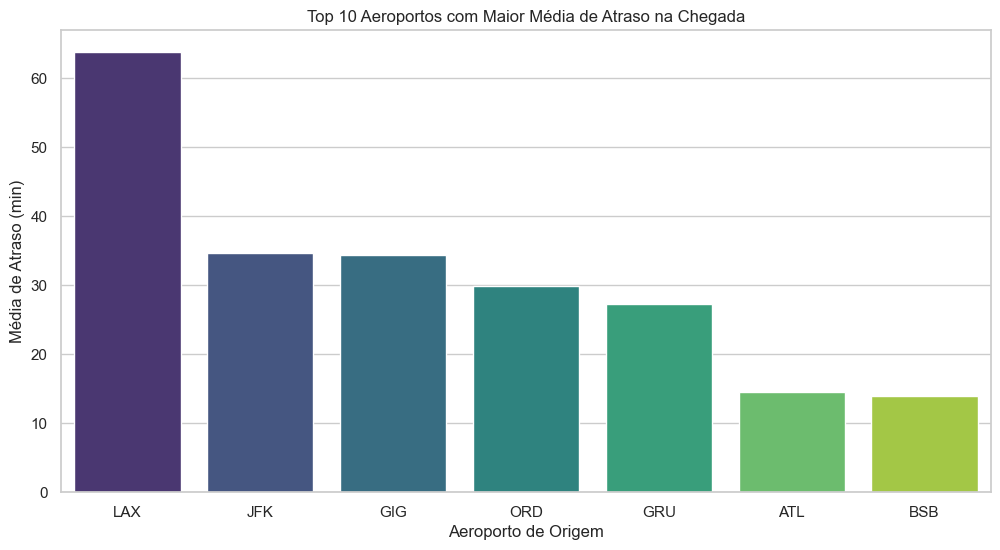

In [177]:
# Barplot da coluna ARR_DELAY
plt.figure(figsize=(12, 6))
sns.barplot(x='ORIGIN', y='ARR_DELAY', data=top_aeroportos_arr, palette='viridis')
plt.title('Top 10 Aeroportos com Maior Média de Atraso na Chegada')
plt.xlabel('Aeroporto de Origem')
plt.ylabel('Média de Atraso (min)')
plt.savefig(f'{pasta_saida}/barplot_top10_aeroportos_arr.png')
plt.show()

# Insights e Observações

### 1 - Qualidade e Tratamento de Dados
* Foi identificada a ausência de valores nas colunas de atraso DEP_DELAY e ARR_DELAY
    * Foi utilizada uma estratégia de imputação na qual os dados ausentes foram preenchidos com o valor 0 (assumindo que o voo foi pontual) e também foram criadas colunas de "Flag" para demarcar quais registros eram origalmente nulos, evitando a perca da informação de que o dado era 'desconhecido'.
* A coluna FL_DATE foi convertida para o tipo datetime e as colunas categóricas de texto foram normalizadas (maiúsculas e sem espaços) para garantir que não hajam inconsistências nestes registros.

### 2 - Padrões de Distribuição (Histogramas e Boxplots)
* A distrivuição dos atrasos não segue uma curva normal perfeita. Pode ser observado uma concentração de dados em torno de zero (voos pontuais ou adiantados) e uma cauda longa à direita, indicando a presença de atrasos extremos.
* Os Boxplots confirmaram a presença de outliers significativos tanto na partida quanto na chegada.

### 3 - Correlações (Heatmap)
* Foi identificado uma correlação positiva muito forte entre DEP_DELAY e ARR_DELAY, indicando que neste dataset é raro que um tempo perdido na decolagem seja recuperado durante o voo.
* A correlação entre a variável DISTANCE com os atrasos se mostrou ser fraca, indicando que os mais longos não necessariamente atrasam mais do que voos curtos com base apenas nessa variável.

### 4 - Análise de Aeroportos (Barplots)
* Para o estabelecimento do ranking dos "10 Aeroportos com Maior Atraso", foram filtrados apenas os voos com atraso positivo.
* O gráfico de barras permitiu identificar frequências específicas em certas origens, quedemandariam uma investigação mais aprofundada sobre infraestrutura ou tráfego aéreo local.

### 5 - Limitações e Hipóteses Futuras
* O dataset é sintético e pequeno (apenas 100 linhas), o que limita a generalização estatística dos achados para o mundo real.
* Futuramente, seria interessante cruzar os dados com a variável temporal (Mês ou Dia da Semana) criada na engenharia de atributos para verificar se existe sazonalidade.